# A testing ground for pyPIPS functionality
Testing automatic detection of deployments using time jumps, compass direction changes, and gps speed/location changes

In [3]:
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
#from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
#import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
#import pyPIPS.simulator as sim
import pyPIPS.pips_io as pipsio
import pyPIPS.PIPS as pips
import pyPIPS.parsivel_params as pp
import pyPIPS.parsivel_qc as pqc
import pyPIPS.polarimetric as dualpol
#from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
# from pyCRMtools.pycaps import arps_read
# from pyCRMtools.pycaps import pycaps_fields
# from pyCRMtools.pycaps import calvars_radar as radar
import pandas as pd
import xarray as xr
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
import cartopy.crs as ccrs
from natsort import natsorted
from pprint import pprint
import warnings
warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
PIPS_dir = '/Users/dawson29/Dropbox/PIPS_data/2016/022416/netcdf'
parsivel_filepath = os.path.join(PIPS_dir, 'parsivel_combined_Test_022416_PIPS1A_10s.nc')
conv_filepath = os.path.join(PIPS_dir, 'conventional_raw_Test_022416_PIPS1A.nc')
parsivel_ds = xr.load_dataset(parsivel_filepath)
conv_ds = xr.load_dataset(conv_filepath)

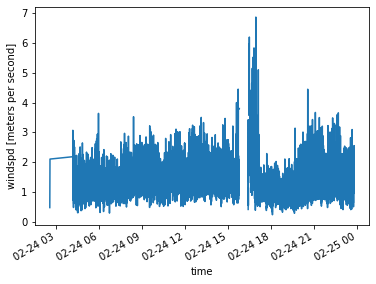

In [6]:
wind_spd_parsivel = parsivel_ds['windspd']
wind_spd_parsivel.plot()

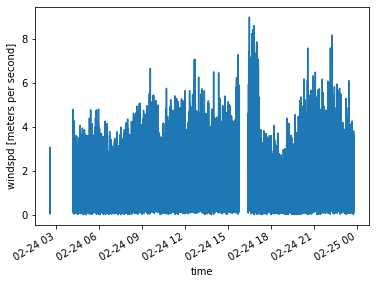

In [7]:
wind_spd_conv = conv_ds['windspd']
wind_spd_conv.plot()

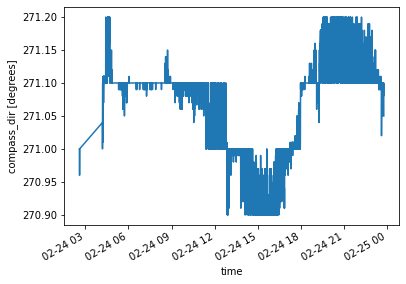

In [8]:
compass_dir_parsivel = parsivel_ds['compass_dir']
compass_dir_parsivel.plot()

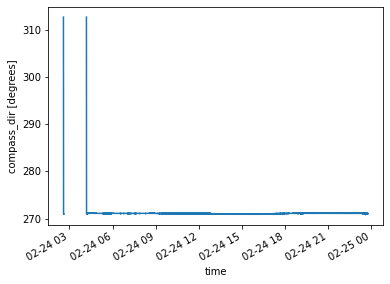

In [9]:
compass_dir_conv = conv_ds['compass_dir']
compass_dir_conv.plot()

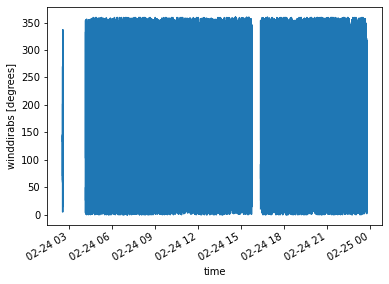

In [10]:
wind_dir_conv = conv_ds['winddirabs']
wind_dir_conv.plot()

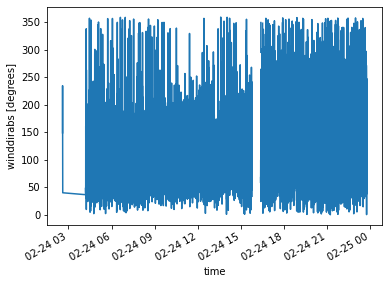

In [11]:
wind_dir_parsivel = parsivel_ds['winddirabs']
wind_dir_parsivel.plot()

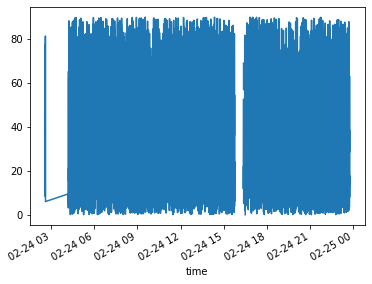

In [12]:
parsivel_angle = pips.calc_parsivel_wind_angle(wind_dir_parsivel, compass_dir_parsivel, parsivel_ds.parsivel_angle)
parsivel_angle.plot()

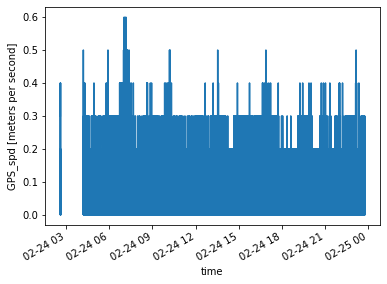

In [19]:
conv_ds['GPS_spd'].plot()

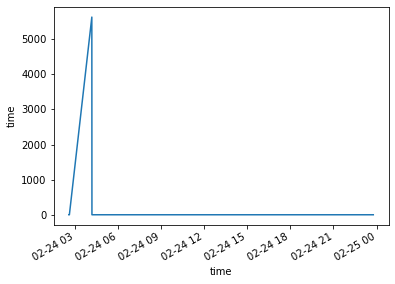

In [20]:
time_diff = conv_ds['time'].diff('time').astype(np.float)*1.e-9
time_diff.plot()

In [13]:
print(wind_dir_conv.coords['time'])
print(len(wind_dir_conv.time))
print(len(np.unique(wind_dir_conv.time.data)))
unique_times = np.unique(wind_dir_conv['time'])
print(unique_times)
duplicated = wind_dir_conv.indexes['time'].duplicated()
print(duplicated)
dup_indices = np.where(duplicated)[0]
print(dup_indices)
#duplicated = xr.DataArray(parsivel_ds_read.indexes['time'].duplicated())
duplicated_times = wind_dir_conv['time'].isel(time=dup_indices)
print(duplicated_times)
duplicated_times_only = wind_dir_conv.isel(time=dup_indices)
print(duplicated_times_only)

<xarray.DataArray 'time' (time: 70686)>
array(['2016-02-24T02:34:22.000000000', '2016-02-24T02:34:23.000000000',
       '2016-02-24T02:34:24.000000000', ..., '2016-02-24T23:46:13.000000000',
       '2016-02-24T23:46:14.000000000', '2016-02-24T23:46:15.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-02-24T02:34:22 ... 2016-02-24T23:46:15
70686
70686
['2016-02-24T02:34:22.000000000' '2016-02-24T02:34:23.000000000'
 '2016-02-24T02:34:24.000000000' ... '2016-02-24T23:46:13.000000000'
 '2016-02-24T23:46:14.000000000' '2016-02-24T23:46:15.000000000']
[False False False ... False False False]
[]
<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 
<xarray.DataArray 'winddirabs' (time: 0)>
array([], dtype=float64)
Coordinates:
  * time     (time) datetime64[ns] 
Attributes:
    units:    degrees


In [14]:
time_diff = wind_spd_conv['time'].diff('time').astype(np.float)*1.e-9
print(time_diff)
out_of_order_times = time_diff.where(time_diff < 0, drop=True)['time']
print(out_of_order_times)

<xarray.DataArray 'time' (time: 70685)>
array([1., 1., 1., ..., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 2016-02-24T02:34:23 ... 2016-02-24T23:46:15
<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 


In [ ]:
int_indices = range(wind_spd_conv.sizes['time'])
print(wind_spd_conv.coords['time'].values)
int_ind_da = xr.DataArray(int_indices, coords=[('time', wind_spd_conv.coords['time'].values)])
print(int_ind_da)

In [ ]:
print(int_ind_da.sel(time='2017-04-30T20:40:18.000000000'))

In [ ]:
print(wind_spd_conv.isel(time=74415))
print(wind_spd_conv.isel(time=74416))
print(wind_spd_conv.isel(time=74417))
print(wind_spd_conv.isel(time=74418))

In [ ]:
time_diff = parsivel_ds['time'].diff('time').astype(np.float)*1.e-9
print(time_diff)
out_of_order_times = time_diff.where(time_diff < 0, drop=True)['time']
print(out_of_order_times)

In [ ]:
PIPS_dir2 = '/Volumes/scr_fast/Projects/VORTEXSE/obsdata/full_PIPS_dataset_new_test/'
parsivel_filepath2 = os.path.join(PIPS_dir, 'parsivel_combined_FMCW_2017_043017_PIPS2A_60s.nc')
conv_filepath2 = os.path.join(PIPS_dir, 'conventional_raw_FMCW_2017_043017_PIPS2A.nc')
parsivel_ds2 = xr.load_dataset(parsivel_filepath2)
conv_ds2 = xr.load_dataset(conv_filepath2)

In [ ]:
time_diff = parsivel_ds2['time'].diff('time').astype(np.float)*1.e-9
print(time_diff)
out_of_order_times = time_diff.where(time_diff < 0, drop=True)['time']
print(out_of_order_times)